In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 50) #como mucho ver 50 filas

In [3]:
''' + Sólo 8 atributos son comunes a todos los valores
    + Se podrían renombrar varias columnas
    + Podria cambiarse el orden de algunas columnas
'''

df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
''' + id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
    + gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
    + fecha se puede pasar a datetime
    + tipodepropiedad, ciudad y provincia podrían ser categorías
'''

df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [5]:
''' Hay todo tipo de datos incorrectos
'''

df[['direccion', 'descripcion', 'titulo']]

,direccion,descripcion,titulo
0,Avenida Division del Norte 2005,"depto. interior de 80.15m2, consta de sala com...",depto. tipo a-402
1,AV. MEXICO,"<p>entre sonora y guerrero, atr&aacute;s del h...",condominio horizontal en venta
2,Urbi Tonala,descripcion \nla mejor ubicacion residencial e...,casa en venta urbi 3 recamaras tonala
3,IGNACIO MANUEL ALTAMIRANO 128,casa en privada con caseta de vigilancia casas...,casa sola en toluca zinacantepec con credito i...
4,PASEOS DEL SOL,bonito departamento en excelentes condiciones ...,paseos del sol
5,Condominio Tlalpan 2B,"amplio departamento, estancia de sala y comedo...",departamento en venta taxqueña
6,NaN,"ubicada en esquina, pertenece san lorenzo agen...",de oportunidad casa en san lorenzo
7,condominio el trebol,casa emilia en venta playa del carmenfracciona...,casa emilia en venta en selvamar playa del carmen
8,BUENAVISTA DEPTOS CON SUBSIDIO,<p>pre-venta de preciosos departamento ecologi...,pre- venta preciosos depas 2 recamaras con sub...
9,Av. Morelos,"terreno de 5.500m2 bardeado, uso de suelo h-20...",terreno


In [6]:
''' Todos los precios son enteros.'''
pd.reset_option('float_format') #Sólo por si posteriormente se cambia el formato de los float
df.sample(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
80028,3156,"casa en venta en tejeda, corregidora","<p>en la parte baja del fraccionamiento, cerca...",Casa,Paseo de Oslo,Corregidora,Querétaro,20.0,3.0,2.0,2.0,180.0,135.0,86235.0,20.545807,-100.422421,2013-01-18 00:00:00,0.0,0.0,0.0,1.0,1.0,1450000.0
70925,66471,vendo casa en calle 3 col. las aguilas ciuda...,vendo casa en alianza con dien asesores inmobi...,Casa,Calle 3 #170 Col. Las Aguilas CD. Nezahualco...,Nezahualcóyotl,Edo. de México,10.0,3.0,2.0,3.0,280.0,170.0,59719.0,19.374605,-98.984240,2014-06-02 00:00:00,0.0,0.0,0.0,0.0,0.0,1600000.0
66212,2165,casa en condominio de 2 habitaciones en venta ...,<p>excelente casa en condominio en perfecto es...,Casa en condominio,Privada Av Mexico LA MORADA 0,Cuajimalpa de Morelos,Distrito Federal,17.0,2.0,NaN,NaN,195.0,170.0,23734.0,NaN,NaN,2014-01-16 00:00:00,0.0,0.0,0.0,1.0,0.0,2950000.0
83357,114922,casa en venta en la colonia domingo arrieta,"casa en 2 plantas\np.b. cochera para 4 autos, ...",Casa,NaN,Durango,Durango,NaN,NaN,0.0,NaN,320.0,397.0,NaN,23.996329,-104.664688,2016-09-08 00:00:00,0.0,0.0,0.0,0.0,0.0,1950000.0
31885,188685,loft con vigilancia,minimalista vigilancia: doble casta de vigila...,Apartamento,NaN,Cuernavaca,Morelos,1.0,2.0,2.0,2.0,88.0,NaN,65672.0,NaN,NaN,2012-11-23 00:00:00,0.0,0.0,0.0,0.0,0.0,1950000.0


In [7]:
''' Renombrar las columnas
'''

nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Titulo',
                 'descripcion' : 'Descripcion',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Direccion',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antiguedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBanos',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMultiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [8]:
''' Reacomodamiento de columnas
'''

nombresEnOrden = [
                 'ID',
                 'Titulo',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antiguedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripcion',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBanos',
               
                 'IDZona',
                 'Direccion',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMultiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
0,254099,depto. tipo a-402,Apartamento,2273000.0,2015-08-23 00:00:00,NaN,80.0,80.0,"depto. interior de 80.15m2, consta de sala com...",2.0,1.0,2.0,23533.0,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,53461,condominio horizontal en venta,Casa en condominio,3600000.0,2013-06-28 00:00:00,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del h...",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0
2,247984,casa en venta urbi 3 recamaras tonala,Casa,1200000.0,2015-10-17 00:00:00,5.0,144.0,166.0,descripcion \nla mejor ubicacion residencial e...,3.0,2.0,2.0,48551.0,Urbi Tonala,Tonalá,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,209067,casa sola en toluca zinacantepec con credito i...,Casa,650000.0,2012-03-09 00:00:00,1.0,63.0,67.0,casa en privada con caseta de vigilancia casas...,2.0,1.0,1.0,53666.0,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0
4,185997,paseos del sol,Apartamento,1150000.0,2016-06-07 00:00:00,10.0,95.0,95.0,bonito departamento en excelentes condiciones ...,2.0,1.0,1.0,47835.0,PASEOS DEL SOL,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [9]:
(df.memory_usage(deep = True).sum()/1024)/1024 #Memoria Original

249.11323833465576

In [10]:
''' Verificación adicional de valores máximos para columnas numéricas cuyo tipo se quiere modificar
'''

[
dfok['ID'].max(),
    
dfok['Antiguedad'].max(), 
dfok['CantHabitaciones'].max(), 
dfok['CantGarages'].max(),
dfok['CantBanos'].max() ,

dfok['MetrosCuadradosCubiertos'].max(),
dfok['MetrosCuadradosTotales'].max(),    
dfok['IDZona'].max(),
dfok['Precio'].max(),] 

[299999, 80.0, 10.0, 3.0, 4.0, 439.0, 439.0, 50003999.0, 12525000.0]

In [11]:
"""''' Adecuación de tipos de columnas

    Considerar las cotas:
    uint8   -> 255
    uint16  -> 65 535
    uint32  -> 4 294 967 295
    uint64  -> 18 446 744 073 709 551 615
'''

# Numéricos
dfok['ID'] = dfok['ID'].astype(np.uint32)

dfok['Antiguedad'] = dfok['Antiguedad'].astype(np.uint8)
dfok['CantHabitaciones'] = dfok['CantHabitaciones'].astype(np.uint8)
dfok['CantGarages'] = dfok['CantGarages'].astype(np.uint8)
dfok['CantBanos'] = dfok['CantBanos'].astype(np.uint8)

dfok['MetrosCuadradosCubiertos'] = dfok['MetrosCuadradosCubiertos'].astype(np.uint16)
dfok['MetrosCuadradosTotales'] = dfok['MetrosCuadradosTotales'].astype(np.uint16)
dfok['IDZona'] = dfok['IDZona'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMúltiples'] = dfok['TieneUsosMúltiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

# Categóricas
dfok['TipoPropiedad'] = dfok['TipoPropiedad'].astype('category')
dfok['Ciudad'] = dfok['Ciudad'].astype('category')
dfok['Provincia'] = dfok['Provincia'].astype('category')

dfok.info() """

"''' Adecuación de tipos de columnas\n\n    Considerar las cotas:\n    uint8   -> 255\n    uint16  -> 65 535\n    uint32  -> 4 294 967 295\n    uint64  -> 18 446 744 073 709 551 615\n'''\n\n# Numéricos\ndfok['ID'] = dfok['ID'].astype(np.uint32)\n\ndfok['Antiguedad'] = dfok['Antiguedad'].astype(np.uint8)\ndfok['CantHabitaciones'] = dfok['CantHabitaciones'].astype(np.uint8)\ndfok['CantGarages'] = dfok['CantGarages'].astype(np.uint8)\ndfok['CantBanos'] = dfok['CantBanos'].astype(np.uint8)\n\ndfok['MetrosCuadradosCubiertos'] = dfok['MetrosCuadradosCubiertos'].astype(np.uint16)\ndfok['MetrosCuadradosTotales'] = dfok['MetrosCuadradosTotales'].astype(np.uint16)\ndfok['IDZona'] = dfok['IDZona'].astype(np.uint32)\ndfok['Precio'] = dfok['Precio'].astype(np.uint32)\n\n# Booleanos\ndfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)\ndfok['TieneUsosMúltiples'] = dfok['TieneUsosMúltiples'].astype(np.bool)\ndfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)\ndfok['TieneEscuelasCerca

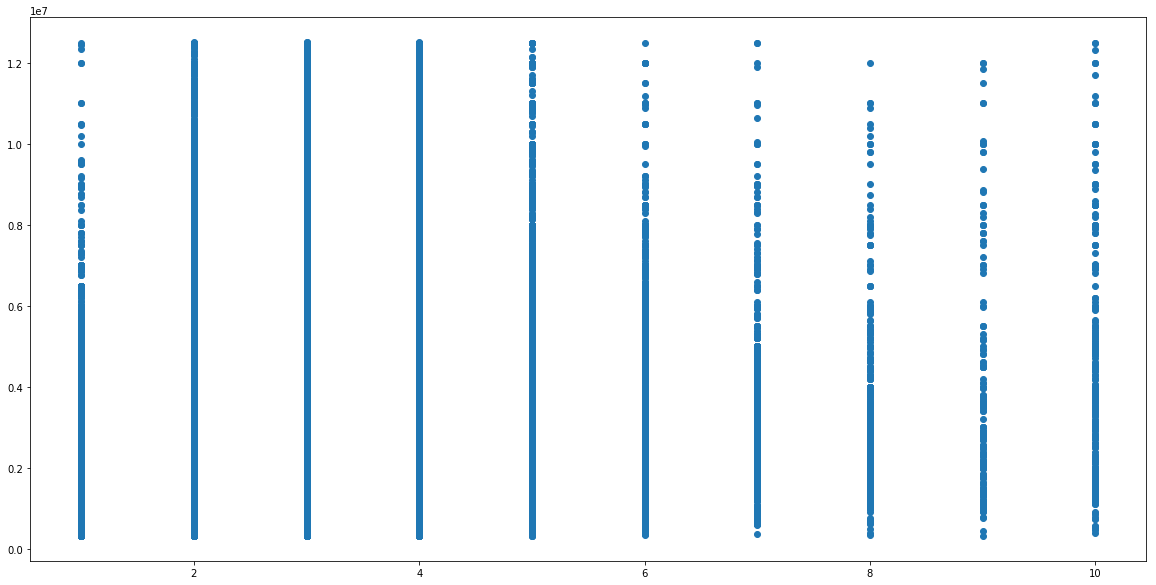

In [12]:
''' ¿El precio es proporcional a la cantidad de habitaciones?
'''

plt.figure(figsize = (20, 10))

# Variables a graficar
x = dfok['CantHabitaciones']
y = dfok['Precio']

# Tipo de gráfico
plt.scatter(x, y)

In [13]:
''' PROMEDIO: por eso el precio separado por ,'''

pd.options.display.float_format = '{:,.0f}'.format
dfok.groupby('CantHabitaciones').mean()['Precio']

CantHabitaciones
1    1,806,075
2    1,616,900
3    2,769,607
4    3,494,389
5    3,284,972
6    3,165,559
7    3,562,564
8    3,432,464
9    3,936,174
10   4,520,162
Name: Precio, dtype: float64

In [14]:
dfok.groupby('CantHabitaciones').std()['Precio'] / pow(dfok.groupby('CantHabitaciones').count()['ID'], 1/2) #Aplicando De Moivre

CantHabitaciones
1     21,763
2      6,873
3      6,155
4     14,637
5     33,264
6     51,655
7     98,863
8    109,213
9    209,751
10   153,869
dtype: float64

In [15]:
pd.reset_option('float_format') # Volver a la normalidad el formato de los float
print(dfok.groupby('CantHabitaciones').count()['ID'])

CantHabitaciones
1.0       5069
2.0      57808
3.0     121887
4.0      25068
5.0       4596
6.0       1669
7.0        539
8.0        398
9.0        179
10.0       316
Name: ID, dtype: int64


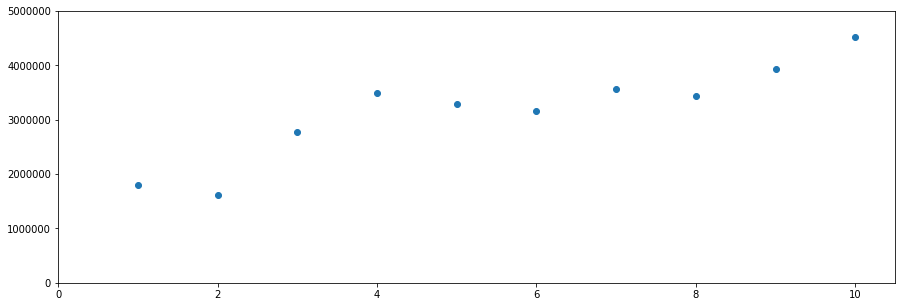

In [16]:
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfok.groupby('CantHabitaciones').mean()['Precio']

plt.figure(figsize = (15, 5))
plt.xlim([0, 10.5])
plt.ylim([0, 5000000])

# Tipo de gráfico
plt.scatter(x, y)

In [17]:
dfok['Precio'].sort_values()

90265       310000.0
100685      310000.0
42684       310000.0
161562      310000.0
25309       310000.0
91082       310000.0
65104       310000.0
124407      310000.0
40435       310000.0
237996      310000.0
47495       310000.0
174993      310000.0
191140      310000.0
62494       310000.0
136362      310000.0
237290      310000.0
15192       310000.0
150818      310000.0
193138      310000.0
224654      310000.0
84830       310000.0
9812        310000.0
4940        310000.0
169938      310000.0
30570       310000.0
             ...    
140544    12500000.0
105213    12500000.0
21404     12500000.0
139897    12500000.0
135322    12500000.0
209045    12500000.0
45423     12500000.0
22365     12500000.0
71981     12500000.0
205895    12500000.0
193545    12500000.0
99946     12500000.0
132849    12500000.0
32242     12500000.0
169939    12500000.0
201951    12500000.0
146574    12500000.0
205417    12500000.0
187379    12500000.0
124973    12500000.0
232457    12515000.0
192956    125

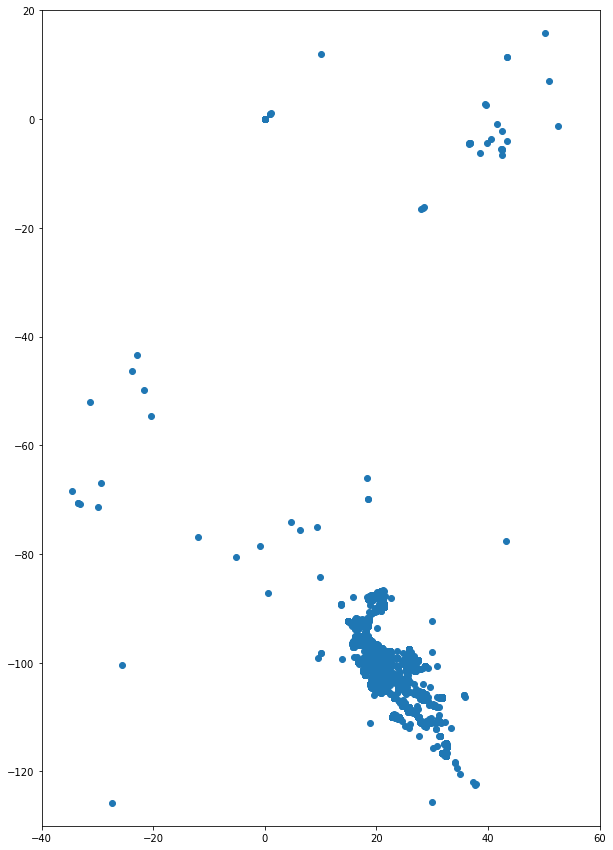

In [18]:
''' Se respeta el formato del plot según el tamaño de los ejes.'''

# Declarás variables a graficar
x = dfok['Latitud']
y = dfok['Longitud']

plt.figure(figsize = (10, 15))
plt.xlim([-40, 60])
plt.ylim([-130, 20])

# Tipo de gráficok
plt.scatter(x, y)

#### Hay muchas filas que contienen una cantidad mayor de metros cubiertos que de metros totales, en dichos casos decidimos no modificar nada, ya que al contrastar los valores que figuraban en las dos columnas con la descripcion de la propiedad no encontramos un patron claro, en algunos casos el valor que correspondia a metros cubiertos era el valor correcto, mientras que en otros casos se expresaba la superficie no cubierta como superficie total, y asi habia distintos casos.

#### Veamos que no haya precios negativos

In [19]:
dfok["Precio"].describe()

count    2.400000e+05
mean     2.530838e+06
std      2.152552e+06
min      3.100000e+05
25%      9.527725e+05
50%      1.850000e+06
75%      3.390000e+06
max      1.252500e+07
Name: Precio, dtype: float64

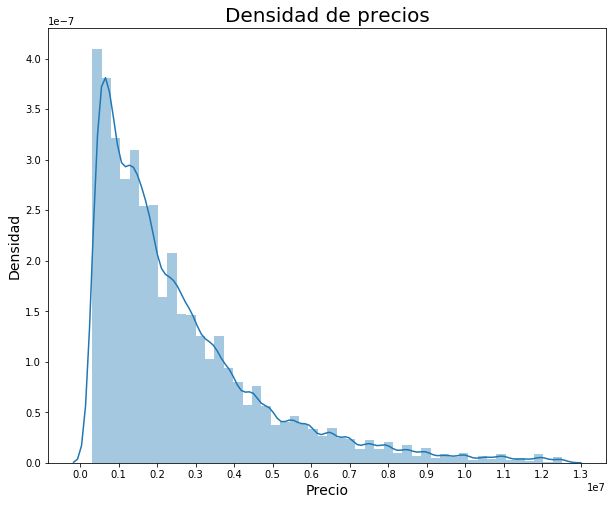

In [20]:
plt.subplots(figsize=(10,8));
sb.distplot(dfok['Precio'])
plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("Precio", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.title("Densidad de precios", fontsize=20);

#### Se puede observar que hay bastante asimetria en la distribucion, la podemos medir usando la *skewness*:

In [21]:
print("Skewness: {0:.4f}".format(dfok['Precio'].skew()))

Skewness: 1.7020


#### Tambien se puede ver cierto efecto de cola larga en la distribucion, la *curtosis* mide esto: 

In [22]:
print("Curtosis: {0:.4f}".format(dfok['Precio'].kurt()))

Curtosis: 3.2311


### Algunos graficos basicos sobre como se distribuyen las propiedades

In [23]:
dfok["Antiguedad"].describe()

count    196445.000000
mean          8.116114
std           9.553830
min           0.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          80.000000
Name: Antiguedad, dtype: float64

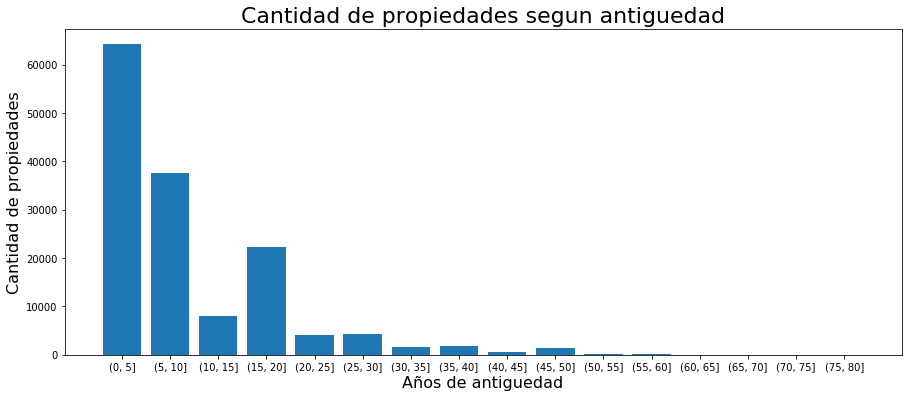

In [24]:
bins = pd.cut(dfok["Antiguedad"], [i for i in range(0, 81, 5)])
df_ant = dfok.groupby(bins).size()
plt.figure(figsize=(15,6))
plt.bar(df_ant.index.astype(str), df_ant.values)
plt.xlabel("Años de antiguedad", fontsize=16)
plt.ylabel("Cantidad de propiedades",fontsize=16)
plt.title("Cantidad de propiedades segun antiguedad", fontsize=22);

### Podemos ver que la mayoria de las propiedades tienen una antiguedad relativamente baja(0-10 años) junto con una gran cantidad teniendo entre 15 y 20 años.

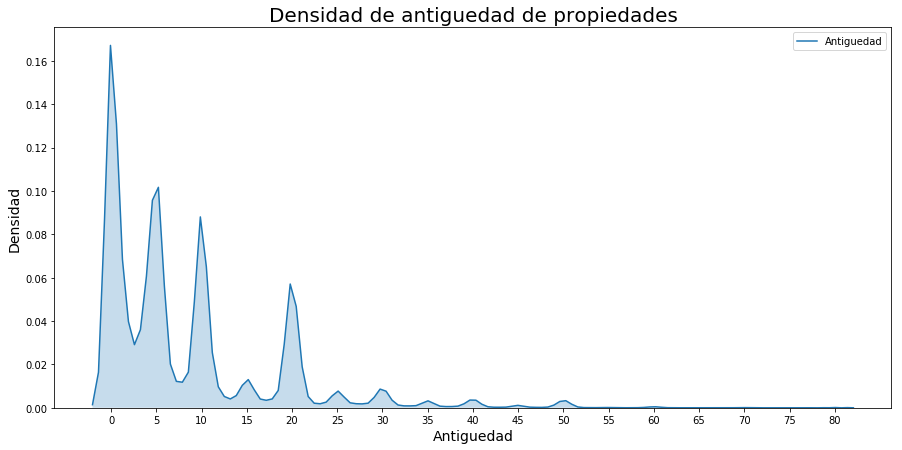

In [46]:
df_ant = dfok[pd.notnull(dfok["Antiguedad"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

plt.subplots(figsize=(15,7));
sb.kdeplot(df_ant['Antiguedad'], shade=True)
plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Antiguedad", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.title("Densidad de antiguedad de propiedades", fontsize=20);

### Los distintos picos que se ven nos permiten concluir que, a pesar de que la antiguedad es cualquier numero natural, la gente suele asignarle valores que sean multiplos de 10 o de 5 con menor frecuencia (es decir, 20 años por sobre 19 o 21, 30 por sobre 29, 28 o 31, 15 por sobre 14 o 13, etc)

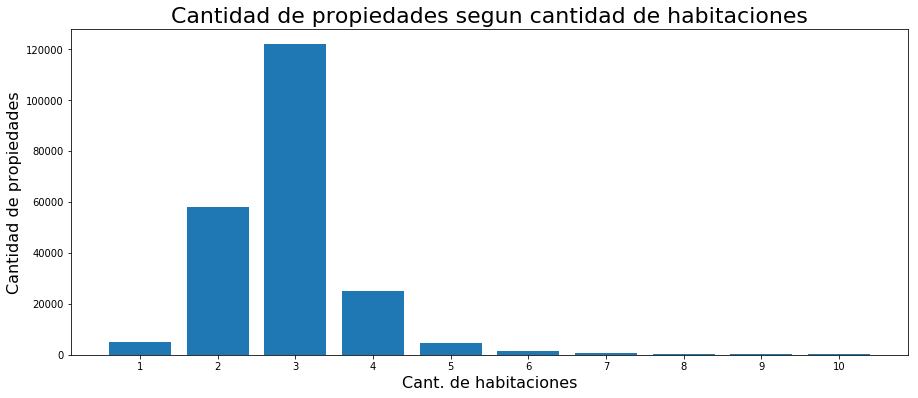

In [32]:
df_hab = dfok.groupby("CantHabitaciones").size()
plt.figure(figsize=(15,6))
plt.bar(df_hab.index, df_hab.values)
plt.xlabel("Cant. de habitaciones", fontsize=16)
plt.ylabel("Cantidad de propiedades",fontsize=16)
plt.xticks([i for i in range(1,11)])
plt.title("Cantidad de propiedades segun cantidad de habitaciones", fontsize=22);

### Se puede observar que la  gran mayoria de las casas cuentan con 2 o 3 habitaciones y 4 con menor frecuencia.

In [23]:
df_aux = dfok.copy()

In [24]:
def rango_del_precio(df):
    if df["Precio"] <= 1000000:
        return "0\$ - 1,000,000\$"
    elif 1000000 < df["Precio"] <= 2000000:
        return "1,000,000\$ - 2,000,000\$"
    elif 2000000 < df["Precio"] <= 3000000:
        return "2,000,000\$ - 3,000,000\$"
    elif 3000000 < df["Precio"] <= 4000000:
        return "3,000,000\$ - 4,000,000\$"
    elif 4000000 < df["Precio"] <= 6000000:
        return "4,000,000\$ - 6,000,000\$"
    elif 6000000 < df["Precio"] <= 8000000:
        return "6,000,000\$ - 8,000,000\$"
    elif 8000000 < df["Precio"] <= 10000000:
        return "8,000,000\$ - 10,000,000\$"
    elif 10000000 < df["Precio"]:
        return "10,000,000\$ - 14,000,000\$"

In [25]:
df_aux["RangoDePrecios"] = df_aux.apply(rango_del_precio, axis=1)

In [26]:
df_aux = df_aux[["RangoDePrecios", "TieneGimnasio", "TieneUsosMultiples", "TienePileta", "TieneEscuelasCerca", "TieneShoppingsCerca"]]

In [27]:
df_rango = df_aux.groupby("RangoDePrecios").mean().reset_index()

In [28]:
"""Reordeno una fila del DF a mano para que se vean en el orden correcto los rangos de precios"""
temp = df_rango.iloc[2].copy()
df_rango.drop(df_rango.index[2], inplace=True)
df_rango = df_rango.append(temp)

In [29]:
df_rango.index = df_rango["RangoDePrecios"]

In [30]:
df_rango = df_rango.drop("RangoDePrecios", axis=1)

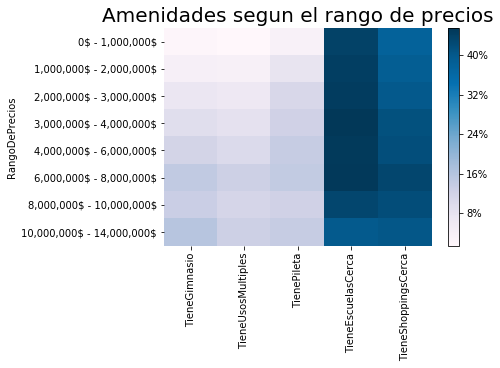

In [73]:
ax = sb.heatmap(df_rango*100,cmap="PuBu", cbar=False);
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([8, 16, 24, 32, 40])
cbar.set_ticklabels(["8%", "16%", "24%", "32%", "40%"])
plt.title("Amenidades segun el rango de precios", fontsize=20);